### Reading Data

In [1]:
import pandas as pd
import numpy
df = pd.read_csv(r"D:\Users\My Projects\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Import Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Exploratary Data Analysis

In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- No Null Values

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

- These are columns

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


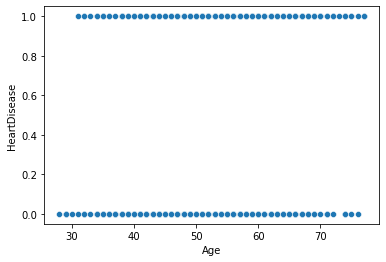

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.scatterplot(x='Age', y='HeartDisease', data=df)
plt.show()

In [8]:
g = df.groupby('HeartDisease')

In [9]:
g.mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


- persons of age more than 55 yrs are likely to get heart disease 

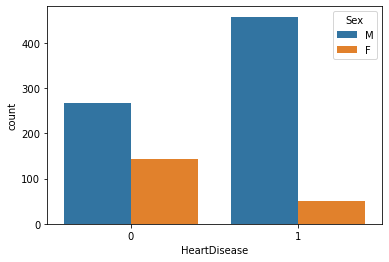

In [10]:
sns.countplot(x='HeartDisease',data=df, hue='Sex')
plt.show()

- males are likely to prone to heart disease than female

In [11]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

- TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

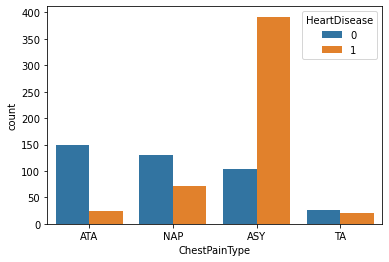

In [12]:
sns.countplot(x='ChestPainType', data=df, hue='HeartDisease')
plt.show()

- human having chestPainType of HeartDisease sre likely to get heart disease

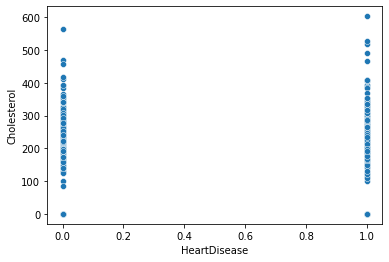

In [13]:
sns.scatterplot(x='HeartDisease', y='Cholesterol', data=df)
plt.show()

- the average cholestrol of man having heart disease is less

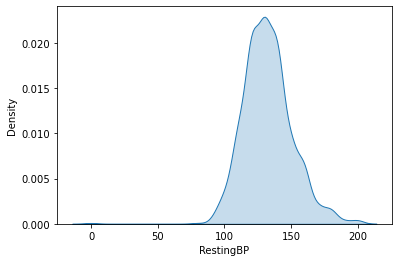

In [14]:
sns.kdeplot(x='RestingBP', data=df, shade=True)
plt.show()

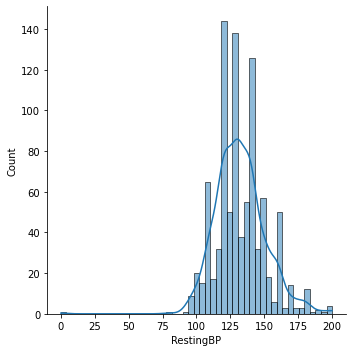

In [15]:
sns.displot(x='RestingBP', data=df, kde=True)
plt.show()

- the above dist plot is a positively skewed one. the maximum datapoints lie between 100 to 150

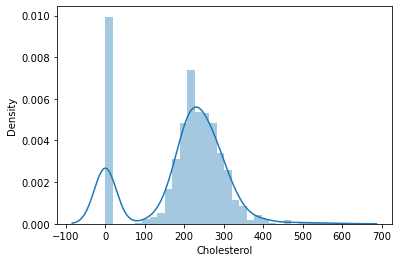

In [16]:
sns.distplot(df['Cholesterol'])
plt.show()

- outlier can be easily observed

### outlier detection and removing outliers

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [19]:
import numpy

In [20]:
continuous_cols = [col for col in df.columns if type(df[col][0]) == numpy.int64 or type(df[col][0]) == numpy.float64]
continuous_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [21]:
categorical_cols = [col for col in df.columns if type(df[col][0]) == str]
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

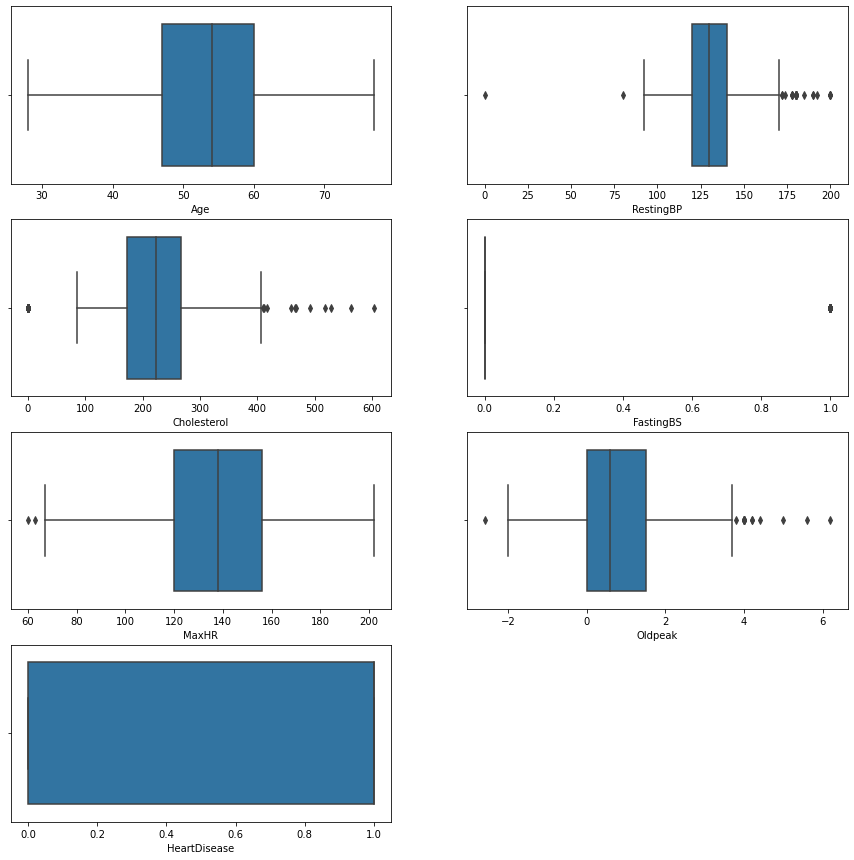

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,15]
for i in enumerate(continuous_cols):
    plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)

In [23]:
def get_boundaries(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - (1.5*iqr)
    upper_limit = q3 + (1.5*iqr)
    return lower_limit, upper_limit

In [24]:
def fill(i, c):
    limits = get_boundaries(df, c)
    if i>limits[1]:
        return limits[1]
    elif i<limits[0]:
        return limits[0]
    else:
        return i

In [25]:
cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in cols:
    df[col] = df[col].apply(fill, c=col)

In [26]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.000000,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,3.750000,1.000000


In [27]:
df.shape

(918, 12)

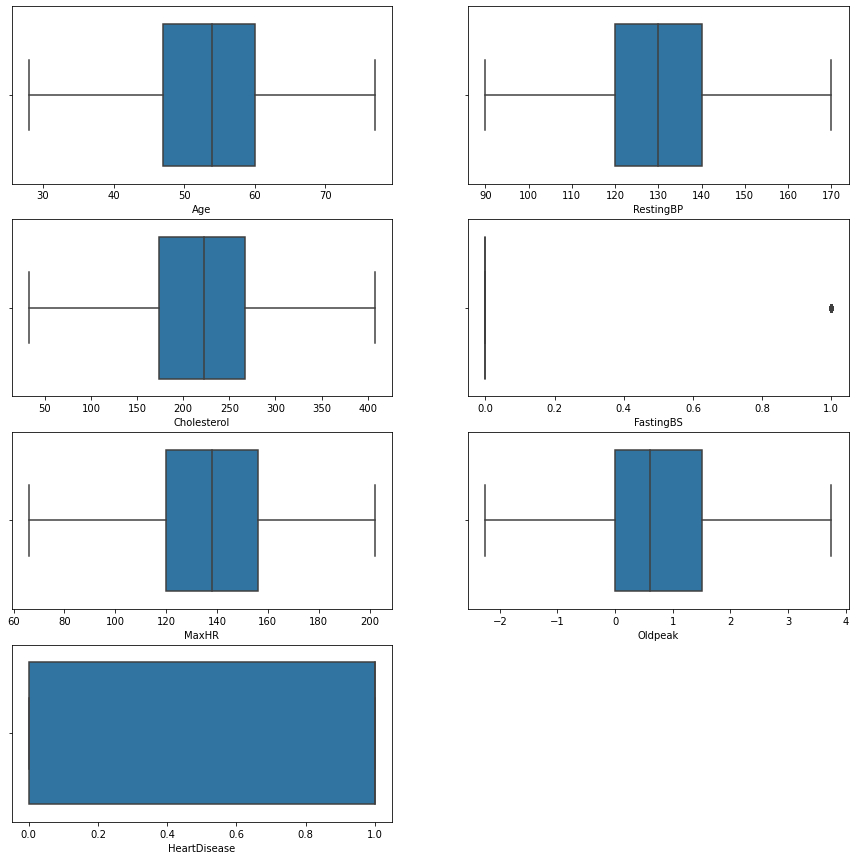

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,15]
for i in enumerate(continuous_cols):
    plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)

- NO Outliers

#### some outliers are removed, we can't remove removing. as this is small dataset

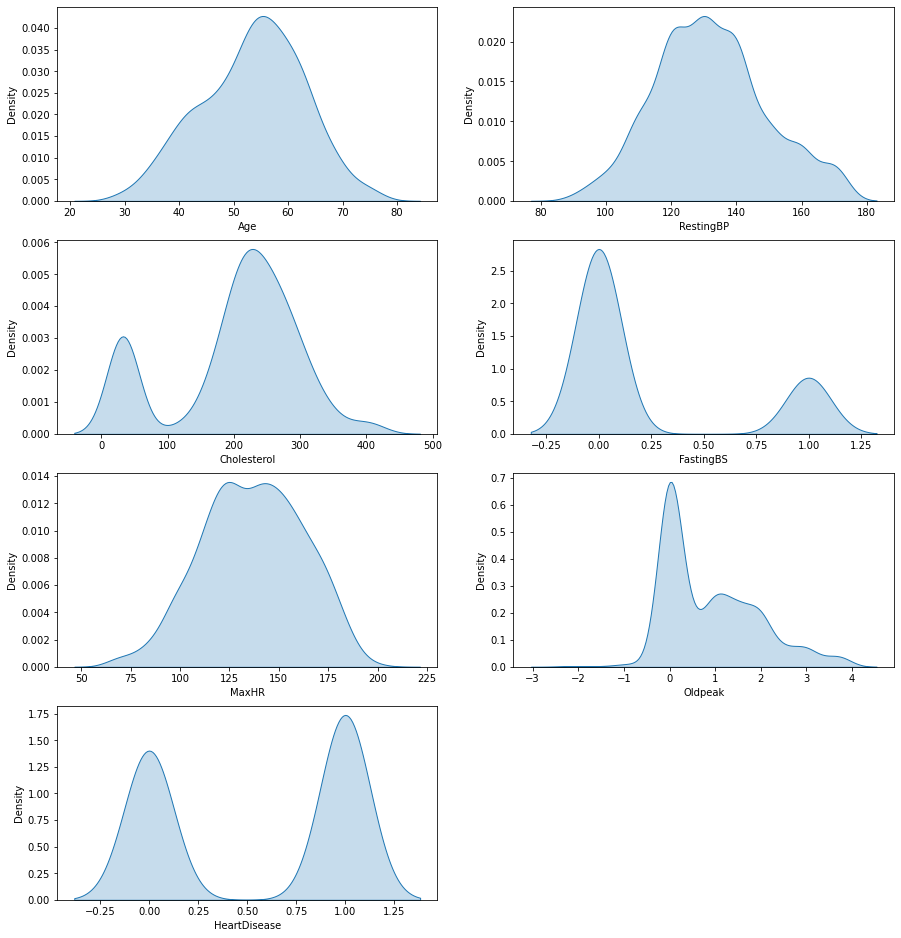

In [29]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,25]
for i in enumerate(continuous_cols):
    plt.subplot(6,2,i[0]+1)
    sns.kdeplot(df[i[1]],shade=True)

### Converting Categorical Columns to Numerical Columns

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [32]:
dummies = pd.get_dummies(df[categorical_cols])
dummies

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [33]:
merged = pd.concat([df, dummies], axis=1)
merged.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [34]:
d1 = merged.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'ST_Slope_Up'], axis=1)
d1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
0,40,140.0,289.0,0,172.0,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
1,49,160.0,180.0,0,156.0,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
2,37,130.0,283.0,0,98.0,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,48,138.0,214.0,0,108.0,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1
4,54,150.0,195.0,0,122.0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0


### Machine Learning Modelling

In [35]:
X = d1.drop('HeartDisease', axis=1)
y = d1['HeartDisease']

In [36]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
lr.score(X_test, y_test)

0.8315217391304348

In [41]:
from sklearn.model_selection import cross_val_score
cv_lr = cross_val_score(LogisticRegression(), X, y, cv=5)
cv_lr

array([0.85326087, 0.86956522, 0.82608696, 0.8579235 , 0.76502732])

In [42]:
print(f"The average cross validation score for Logistic Regression : {numpy.mean(cv_lr)}")

The average cross validation score for Logistic Regression : 0.8343727726300785


In [43]:
cv_svm = cross_val_score(SVC(), X, y, cv=5)
cv_svm

array([0.63043478, 0.77717391, 0.68478261, 0.71038251, 0.61202186])

In [44]:
print(f"The average cross validation score for Support Vector Machine : {numpy.mean(cv_svm)}")

The average cross validation score for Support Vector Machine : 0.6829591351865052


In [45]:
cv_rf = cross_val_score(RandomForestClassifier(), X, y, cv=5)
cv_rf

array([0.86956522, 0.83152174, 0.8423913 , 0.83060109, 0.75956284])

In [46]:
print(f"The average cross validation score for Random Forest : {numpy.mean(cv_rf)}")

The average cross validation score for Random Forest : 0.8267284390591589


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
cv_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
cv_gnb = cross_val_score(GaussianNB(), X, y, cv=5)

In [48]:
cv_dt

array([0.79347826, 0.80978261, 0.75543478, 0.70491803, 0.69945355])

In [49]:
print(f"The average cross validation score for Decision Tree : {numpy.mean(cv_dt)}")

The average cross validation score for Decision Tree : 0.7526134473746733


In [50]:
cv_gnb

array([0.81521739, 0.88043478, 0.80978261, 0.80874317, 0.78142077])

In [51]:
print(f"The average cross validation score for Gaussian naive bayes : {numpy.mean(cv_gnb)}")

The average cross validation score for Gaussian naive bayes : 0.8191197434069851


### - Random Forest is performing better by observing using cross validation

### Hyper Parameter Tuning and Model Selection

In [52]:
model_params = [
    {
        'model':LogisticRegression(),
        'Params':{
            'C':[100,10,1,0.1,0.01]
        }
    },
    {
    'model': SVC(),
        'Params':{
            'C':[100,10,1,0.1,0.01]
        }
    },
    {
    'model': RandomForestClassifier(),
        'Params':{
            'n_estimators': [int(x) for x in numpy.linspace(100, 1000, 5)],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [int(x) for x in numpy.linspace(10,100,5)]
        }
    }
]

In [53]:
for i in model_params:
    print(i['model'])

LogisticRegression()
SVC()
RandomForestClassifier()


In [54]:
from sklearn.model_selection import GridSearchCV
scores = []
for model in model_params:
    grid_search = GridSearchCV(estimator= model['model'], param_grid = model['Params'], cv=5)
    grid_search.fit(X,y)
    scores.append({'model':model['model'], 'best_params':grid_search.best_params_, 'best_score':grid_search.best_score_})

In [55]:
scores

[{'model': LogisticRegression(),
  'best_params': {'C': 1},
  'best_score': 0.8343727726300785},
 {'model': SVC(), 'best_params': {'C': 100}, 'best_score': 0.8006414825374198},
 {'model': RandomForestClassifier(),
  'best_params': {'max_depth': 100,
   'max_features': 'auto',
   'n_estimators': 325},
  'best_score': 0.8376692801140413}]

In [56]:
results = pd.DataFrame(scores)

In [57]:
results

,model,best_params,best_score
0,LogisticRegression(),{'C': 1},0.834373
1,SVC(),{'C': 100},0.800641
2,RandomForestClassifier(),"{'max_depth': 100, 'max_features': 'auto', 'n_...",0.837669


#### Insights drawn:
- Best Model: Random forest
- Best Params: 'max_depth':10, 'max_features':'sqrt', 'n_estimators': 325
- Best Score: 84.2%

### Metrics Evaluation

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=325)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=325)

In [59]:
y_pred = rf.predict(X_test)

In [60]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [61]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
909    1
293    1
761    1
2      0
409    1
Name: HeartDisease, Length: 184, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[60, 17],
       [ 9, 98]], dtype=int64)

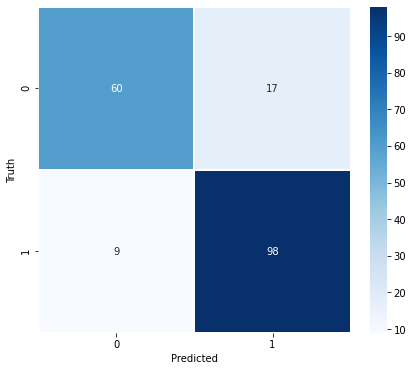

In [63]:
from seaborn import heatmap
import matplotlib
matplotlib.rcParams['figure.figsize'] = [7,6]
heatmap(cm, annot=True, linewidth=1, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

- if the data is 0, then our model predicted it as 0 for 60 times correctly
- if the data is 0, then our model predicted it as 1 for 17 times wrongly
- if the data is 1, then our model predicted it as 1 for 98 times correctly
- if the data is 1, then our model predicted it as 0 for 9 times wrongly

In [64]:
accuracy = (60+98)/(60+98+17+9)
accuracy

0.8586956521739131